In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn import linear_model

netflix_data = pd.read_csv('../input/netflix-subscription-fee-dec2021csv/Netflix subscription fee Dec-2021.csv')

In [2]:
#display(netflix_data)

netflix_data.columns

Index(['Country_code', 'Country', 'Total Library Size', 'No. of TV Shows',
       'No. of Movies', 'Cost Per Month - Basic ($)',
       'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)'],
      dtype='object')

In [3]:
netflix_data.describe()

,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,5314.415385,3518.953846,1795.461538,8.368462,11.990000,15.612923
std,980.322633,723.010556,327.279748,1.937819,2.863979,4.040672
min,2274.000000,1675.000000,373.000000,1.970000,3.000000,4.020000
25%,4948.000000,3154.000000,1628.000000,7.990000,10.710000,13.540000
50%,5195.000000,3512.000000,1841.000000,8.990000,11.490000,14.450000
75%,5952.000000,3832.000000,1980.000000,9.030000,13.540000,18.060000
max,7325.000000,5234.000000,2387.000000,12.880000,20.460000,26.960000


In [4]:
netflix_data_corr = netflix_data.corr('pearson')
cm = sns.light_palette("green", as_cmap=True)
netflix_data_corr.style.background_gradient(cmap=cm)

,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Total Library Size,1.000000,0.971146,0.849957,-0.062877,-0.055200,-0.071521
No. of TV Shows,0.971146,1.000000,0.699786,-0.003814,0.002285,-0.011100
No. of Movies,0.849957,0.699786,1.000000,-0.179913,-0.170391,-0.189711
Cost Per Month - Basic ($),-0.062877,-0.003814,-0.179913,1.000000,0.898535,0.820914
Cost Per Month - Standard ($),-0.055200,0.002285,-0.170391,0.898535,1.000000,0.978768
Cost Per Month - Premium ($),-0.071521,-0.011100,-0.189711,0.820914,0.978768,1.000000


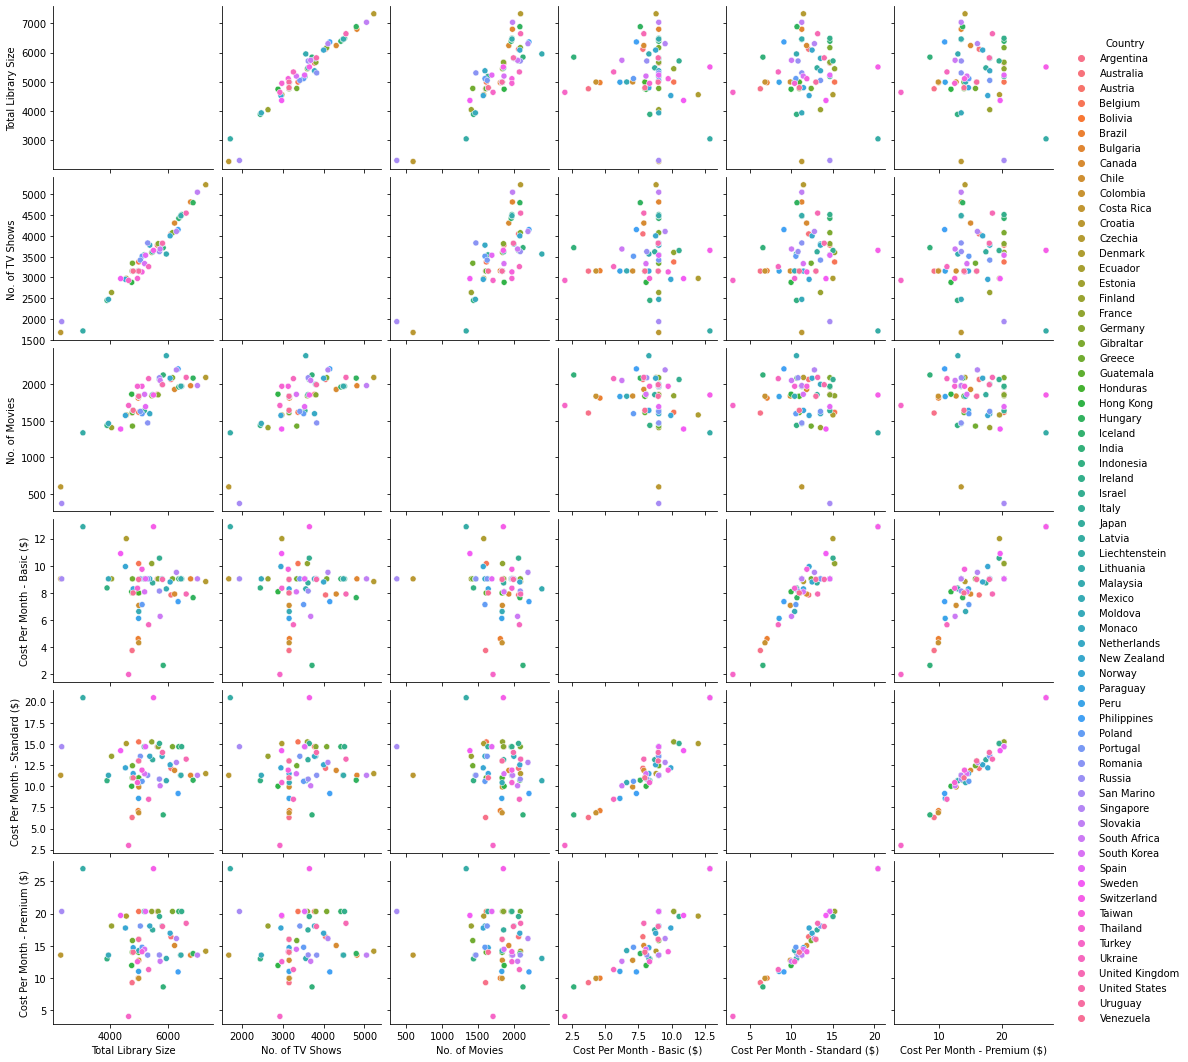

In [5]:
sns.pairplot(netflix_data, hue = 'Country' )

In [6]:
from sklearn import datasets

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(netflix_data['Country'])

features = netflix_data.drop(['Country_code','Country'], axis=1)
labels_name = netflix_data['Country']

Logistic Regression:

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression( max_iter = 10000 )

# Fit the model
model.fit(features, labels)

# Predict data points 
labels_predicted = model.predict(features)
#labels_predicted_test = model.predict(features)

# Print accuracy scores
print('Model accuracy score:', accuracy_score(labels, labels_predicted))

Model accuracy score: 0.9692307692307692


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Decision Trees:

In [8]:
pip install pydotplus

     |████████████████████████████████| 278 kB 598 kB/s            
  Preparing metadata (setup.py) ... - done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=1032ecb492bad2d3c3ef822ae68d1780c09aa4a617b9cb54c60c12cd2be3c754
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [9]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
import pydotplus


clf = DecisionTreeClassifier(random_state=0)

clf = clf.fit(features, labels)
dot_data = tree.export_graphviz(clf)

graph = pydotplus.graph_from_dot_data(dot_data)
## get the png version of the graph
graph.write_png('netflix.png')
## get the pdf version of the graph
graph.write_pdf('netflix.pdf')
# Show graph
Image(graph.create_png())

In [10]:
from sklearn.model_selection import cross_val_score
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, train_size = 0.7)

clf = tree.DecisionTreeClassifier().fit(features, labels)

predicted_labels = clf.predict(features)
accuracy = accuracy_score(labels, predicted_labels)
print('classifier accuracy train:', accuracy)

classifier accuracy train: 1.0


Neural Network:

In [11]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
model = MLPRegressor(random_state=1, max_iter = 10000).fit(features, labels)
model.predict(features)
print('model accuracy:', model.score(features, labels))
scores = cross_val_score(model, features, labels, cv = 10)
scores 

model accuracy: -4.993844448345639


array([  -32.54837685,   -78.08208441,  -157.25221128,  -305.45093839,
        -400.20707048,  -307.71474698,  -428.37890479,  -416.11534532,
        -843.21658382, -1082.11420841])

Support Vector Machines:

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(C = 1000, kernel = 'linear' ))
clf = clf.fit(features, labels)
clf_predict = clf.predict( features )

print('accuracy:', accuracy_score(labels, clf_predict))

accuracy: 1.0
